# Take Home Challeneg-Relax Inc

#### The data has the following two tables:
1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:

● name: the user's name
● object_id: the user's id
● email: email address
● creation_source: how their account was created. This takes on one
of 5 values:
○ PERSONAL_PROJECTS: invited to join another user's
personal workspace
○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)
○ ORG_INVITE: invited to an organization (as a full member)
○ SIGNUP: signed up via the website
○ SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
● creation_time: when they created their account
● last_session_creation_time: unix timestamp of last login
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip
● org_id: the organization (group of users) they belong to
● invited_by_user_id: which user invited them to join (if applicable).


2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .
We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

### 1- I am going to upload some basic libraries .

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2- Uploading the Data (two Datasets)

In [398]:
engage= pd.read_csv(r"C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 26\relax_challenge\takehomeuserengagement.csv")
engage.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [399]:
#engageT=np.transpose(engage)
#engageT.head()

In [400]:
user= pd.read_csv(r"C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 26\relax_challenge\\takehomeusers.csv", encoding='latin-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### 3-Exploring the user dataset and some featuer engineering (EDA and Featur Engineering)

In [401]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


###### people who havebeen active for longer duration and/or have older account are more likely to be among the adopted users. So I am crating two features using the two features that already exist in the dataset;'last_session_creation_time'& 'creation_time'. Then I will drop these two feature from the dataset

In [402]:
# create a feature of user history
# convert both time features into datetime
user['creation_time'] = pd.to_datetime(user['creation_time'], format='%Y-%m-%d %H:%M:%S')
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'], unit='s')
# calculate user history, defined as number of days between account creation and last use
user['active_period'] = user['last_session_creation_time'] - user['creation_time']
user['active_period'] = user['active_period'].dt.days
# calculate account age, defined as number of days since account creation and now
# I don't know when this dataset was collected. Let's use the latest date in creation_time
latest = max(user['creation_time'])
user['account_age'] = latest - user['creation_time']
user['account_age'] = user['account_age'].dt.days
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_period,account_age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,38
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.0,196
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,437
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,374
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,498


In [403]:
user = user.drop(['creation_time', 'last_session_creation_time', 'name','email','invited_by_user_id','org_id'], axis=1)
user.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_period,account_age
0,1,GUEST_INVITE,1,0,0.0,38
1,2,ORG_INVITE,0,0,136.0,196
2,3,ORG_INVITE,0,0,0.0,437
3,4,GUEST_INVITE,0,0,1.0,374
4,5,GUEST_INVITE,0,0,5.0,498


In [404]:
user=user.rename(columns={'object_id':'user_id'})
user.set_index("user_id", inplace = True)
user.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_period,account_age
user_id,,,,,
1,GUEST_INVITE,1,0,0.0,38
2,ORG_INVITE,0,0,136.0,196
3,ORG_INVITE,0,0,0.0,437
4,GUEST_INVITE,0,0,1.0,374
5,GUEST_INVITE,0,0,5.0,498


In [405]:

user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   active_period               8823 non-null   float64
 4   account_age                 12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 562.5+ KB


#### 3.1Exploring the engage dataframe

In [406]:
import datetime
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [407]:
engage.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [408]:
engage['date'] = engage['time_stamp'].dt.date


In [409]:
engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
date          0
dtype: int64

In [410]:
# counting the number of visits by each User_id

engage_pivot = engage.pivot_table(index=engage['user_id'], aggfunc='size')

#print(engage_pivot)
print(engage_pivot)

#engage_pivot.loc[engage['user_id'] == x]

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Length: 8823, dtype: int64


In [411]:
# counting the users who visited the website more than 7 times in total

total=[]

engage_pivot = engage.pivot_table(index=engage['user_id'], aggfunc='size')

for i in range (len(engage['user_id'].unique())):

    total.append (engage_pivot.iloc[i-1])

# number of total userd     
print(sum(x >= 7 for x in total))


1631


##### Definig/creating the target  and creating a new data frame which includes the target value

In [412]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [413]:
adopted_user = engage.groupby('user_id').apply(logins_in_days)
adopted_user.name='adopted_user'
adopted_user.head()


user_id
1    False
2     True
3    False
4    False
5    False
Name: adopted_user, dtype: bool

In [414]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted_user), len(adopted_user)))

There were 1656 adopted users out of 8823 users


In [415]:
Df = pd.concat([user, adopted_user], axis=1, join='inner')
Df['adopted_user'] = Df['adopted_user'].astype(int)

In [416]:
Df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_period,account_age,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,0
2,ORG_INVITE,0,0,136.0,196,1
3,ORG_INVITE,0,0,0.0,437,0
4,GUEST_INVITE,0,0,1.0,374,0
5,GUEST_INVITE,0,0,5.0,498,0


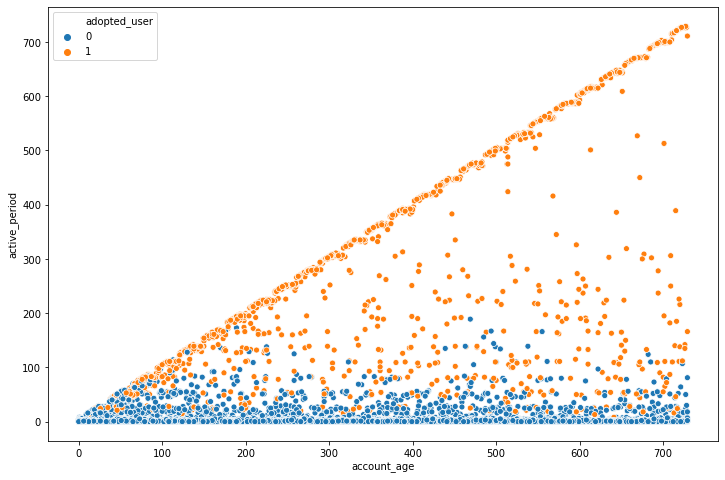

In [417]:

ax, fig = plt.subplots(1, 1, figsize=(12, 8))

sns.scatterplot(data=Df, x="account_age", y="active_period", hue='adopted_user')


In [418]:
Df.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,active_period,account_age,adopted_user
count,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,0.252295,0.151989,59.222147,315.844157,0.187691
std,0.434354,0.359031,144.172167,215.986687,0.390488
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,120.500000,0.000000
50%,0.000000,0.000000,1.000000,294.000000,0.000000
75%,1.000000,0.000000,20.000000,497.000000,0.000000
max,1.000000,1.000000,729.000000,729.000000,1.000000


###### as can be seen the " active_period' column includes Zero values which doesnot make sense. It seems that this values are missing for this feature.So I am going to remove Zeros from the DataFrame. considring the size of dataset and the count of zero values for " active_period', we will still have enough data for this case.



In [419]:
Df = Df[(Df[['active_period']] != 0).all(axis=1)]

print(Df.active_period.value_counts())

1.0      1617
2.0       822
3.0       405
4.0       195
5.0       120
         ... 
467.0       1
173.0       1
450.0       1
311.0       1
579.0       1
Name: active_period, Length: 511, dtype: int64


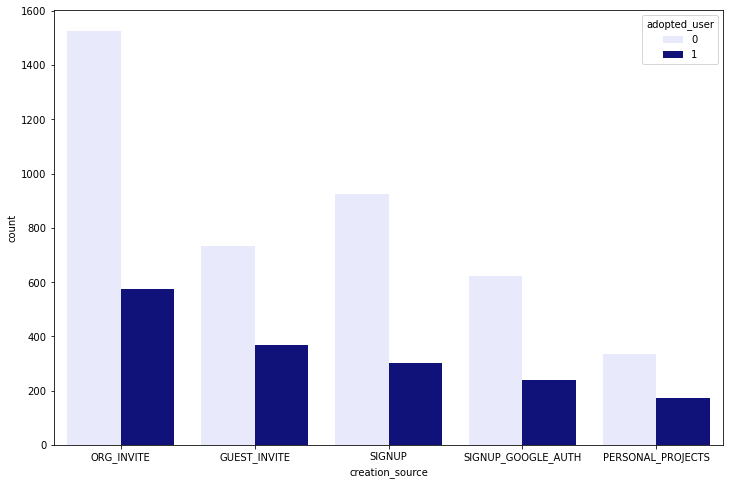

In [420]:
import seaborn as sns


fig = plt.subplots(1, 1, figsize=(12, 8), sharey=True)

sns.countplot(x='creation_source', data=Df, hue='adopted_user', color='darkblue')





In [421]:
Df.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.335150
ORG_INVITE            0.273333
PERSONAL_PROJECTS     0.339250
SIGNUP                0.246129
SIGNUP_GOOGLE_AUTH    0.277584
Name: adopted_user, dtype: float64

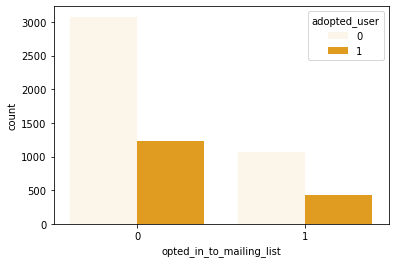

In [422]:
_ = sns.countplot(x='opted_in_to_mailing_list', data=Df, hue='adopted_user', color='orange')

In [423]:
Df.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.285017
1    0.287726
Name: adopted_user, dtype: float64

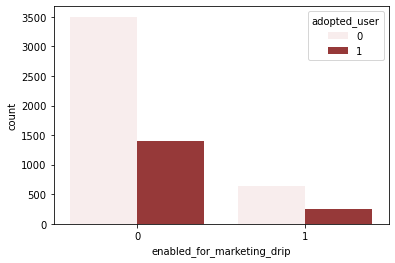

In [424]:
_ = sns.countplot(x='enabled_for_marketing_drip', data=Df, hue='adopted_user', color='brown')

In [425]:
Df.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.285568
1    0.286511
Name: adopted_user, dtype: float64

In [426]:
# Counting the users with Zero history. It seems that the information regarding the last session is not captured. So I will treat this as missing values and will drop them

print(Df.active_period.value_counts())

1.0      1617
2.0       822
3.0       405
4.0       195
5.0       120
         ... 
467.0       1
173.0       1
450.0       1
311.0       1
579.0       1
Name: active_period, Length: 511, dtype: int64


In [427]:
Df.groupby('active_period')['adopted_user'].apply(lambda x: sum(x)/len(x))

active_period
1.0      0.000000
2.0      0.000000
3.0      0.000000
4.0      0.005128
5.0      0.016667
           ...   
724.0    1.000000
725.0    1.000000
726.0    1.000000
727.0    1.000000
729.0    1.000000
Name: adopted_user, Length: 511, dtype: float64

In [428]:
Df['opted_in_to_mailing_list'].unique()

array([0, 1], dtype=int64)

In [429]:
# history and adopted user
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[data['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])


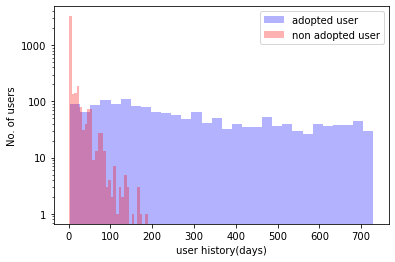

In [430]:
plot_hist_days(Df, 'active_period', 'user history(days)')

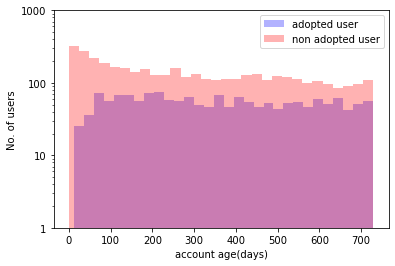

In [431]:
plot_hist_days(Df, 'account_age', 'account age(days)')

In [432]:
adopted_user = engage.groupby('user_id').apply(logins_in_days)

print (adopted_user )

print('There were {} adopted users out of {} users'.format(
sum(adopted_user), len(adopted_user)))          

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Length: 8823, dtype: bool
There were 1656 adopted users out of 8823 users


In [433]:
# make dummy variable for creation source

creation_source = pd.get_dummies(Df['creation_source'], drop_first=True)
Df_model = pd.concat([Df, creation_source], axis=1).drop('creation_source', axis=1)

### 4-Building  and evaluating the predictive models

##### Account _age and active_period have different scale. However, I am not scaling my data because Random Forest is not sensetive to difference of scales. 

In [434]:
y = Df_model['adopted_user']
X = Df_model.drop('adopted_user', axis=1)


In [435]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

##### one way to correct the imbalance data in the data set is to use Random Forest with " balanced" cleass weight.


In [436]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [437]:
# using random Forest as explained above
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 20,100, 80,160, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 20}
Best average precision was 0.9358197426028066


##### Calculating the accuracy

In [438]:
from sklearn.metrics import classification_report, accuracy_score

In [439]:
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=20)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9440993788819876
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1035
           1       0.91      0.89      0.90       414

    accuracy                           0.94      1449
   macro avg       0.93      0.93      0.93      1449
weighted avg       0.94      0.94      0.94      1449



##### Take a look at the feature importance

In [440]:
im_feat = pd.Series(model.feature_importances_, index=X.columns)
im_feat = im_feat.sort_values(ascending=False)
print(im_feat)

active_period                 0.871399
account_age                   0.106675
ORG_INVITE                    0.004283
enabled_for_marketing_drip    0.004161
opted_in_to_mailing_list      0.004004
SIGNUP                        0.003606
SIGNUP_GOOGLE_AUTH            0.003451
PERSONAL_PROJECTS             0.002421
dtype: float64


##### 1- Based on the result it seems that the 'active_period' is the most important feature. So I recommend Relax Inc to motivate the users who werr active for longer period to login and use the software by providing promotions of some sort.  

##### 2- the 2nd most important feature is the account_age. Based on this result I would recommend focusing on the users who opened the account earlier in time and develop some sort of promotions for them to log in and use the software. It seems focusing on  this group will return more value over the same period.